In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import geopandas as gpd
%matplotlib inline

pd.set_option("max_rows",100)

In [3]:
# Filepath to read Crash Data shapefile
filepath_crash_data = "NYC Crash Data - Cashmapper/cartodb-query.shp"
filepath_nyc_boundaries = "Borough Boundaries/geo_export_df017658-06e6-4fbf-8be1-4070c446823f.shp"

In [4]:
Crash_data_gdf = gpd.read_file(filepath_crash_data)
NYC_gdf = gpd.read_file(filepath_nyc_boundaries)

In [5]:
Crash_data_gdf.shape

(38877, 21)

In [6]:
Crash_data_gdf.head()

,cartodb_id,socrata_id,on_street_,cross_stre,date_time,latitude,longitude,borough,zip_code,crash_coun,...,number_o_1,number_o_2,number_o_3,number_o_4,number_o_5,number_o_6,number_o_7,contributi,vehicle_ty,geometry
0,2043328,3656795.0,None,79 WEST DRIVE,2017-04-24,NaN,NaN,None,None,1,...,0,0,0,0,0,1,0,Driver Inattention/Distraction,BICYCLE,None
1,2509642,4124171.0,AVENUE A,None,2019-04-29,40.727844,-73.98223,Manhattan,10009,1,...,0,0,0,0,0,1,0,Alcohol Involvement,Bike,POINT (-73.98223 40.72784)
2,2413283,4069947.0,6 AVENUE,None,2019-01-27,40.669846,-73.98244,Brooklyn,11215,1,...,0,0,0,0,0,1,0,Unspecified,Bike,POINT (-73.98244 40.66985)
3,2083437,3703671.0,61 STREET,None,2017-07-02,40.741280,-73.90257,Queens,None,1,...,0,0,0,0,0,1,0,"Driver Inattention/Distraction,Driver Inattent...","PASSENGER VEHICLE,BICYCLE",POINT (-73.90257 40.74128)
4,2449473,4026726.0,WEST 111 STREET,None,2018-11-11,40.801230,-73.95770,Manhattan,10026,1,...,0,0,0,0,0,1,0,"Unspecified,Unspecified","Sedan,Bike",POINT (-73.95770 40.80123)


In [7]:
Crash_data_gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 38877 entries, 0 to 38876
Data columns (total 21 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   cartodb_id  38877 non-null  int64   
 1   socrata_id  38877 non-null  float64 
 2   on_street_  33122 non-null  object  
 3   cross_stre  19909 non-null  object  
 4   date_time   38877 non-null  object  
 5   latitude    36346 non-null  float64 
 6   longitude   36346 non-null  float64 
 7   borough     37245 non-null  object  
 8   zip_code    30307 non-null  object  
 9   crash_coun  38877 non-null  int64   
 10  number_of_  38877 non-null  int64   
 11  number_o_1  38877 non-null  int64   
 12  number_o_2  38877 non-null  int64   
 13  number_o_3  38877 non-null  int64   
 14  number_o_4  38877 non-null  int64   
 15  number_o_5  38877 non-null  int64   
 16  number_o_6  38877 non-null  int64   
 17  number_o_7  38877 non-null  int64   
 18  contributi  38823 non-null  object  
 

# Selecting Manhatten Crashes only

In [13]:
Crash_data_Manhatten_gdf = Crash_data_gdf[Crash_data_gdf['borough'] == 'Manhattan']

In [14]:
Crash_data_Manhatten_gdf.shape

(10962, 21)

# Selecting only BICYCLE Accidents

In [16]:
Crash_data_Manhatten_gdf.vehicle_ty.value_counts()

PASSENGER VEHICLE,BICYCLE                                               2301
Sedan,Bike                                                              1225
TAXI,BICYCLE                                                            1164
Station Wagon/Sport Utility Vehicle,Bike                                 914
SPORT UTILITY / STATION WAGON,BICYCLE                                    813
                                                                        ... 
LARGE COM VEH(6 OR MORE TIRES),SPORT UTILITY / STATION WAGON,BICYCLE       1
ambulance,Bike                                                             1
Bus,Bike,PK                                                                1
BICYCLE,AR                                                                 1
BICYCLE,TK,PASSENGER VEHICLE                                               1
Name: vehicle_ty, Length: 274, dtype: int64

In [18]:
Crash_data_Manhatten_BiCycles_gdf = Crash_data_Manhatten_gdf[Crash_data_Manhatten_gdf['vehicle_ty'].str.contains('BICYCLE')]

In [19]:
Crash_data_Manhatten_BiCycles_gdf.shape

(6603, 21)

## Sanity Check - Visualization

<AxesSubplot:>

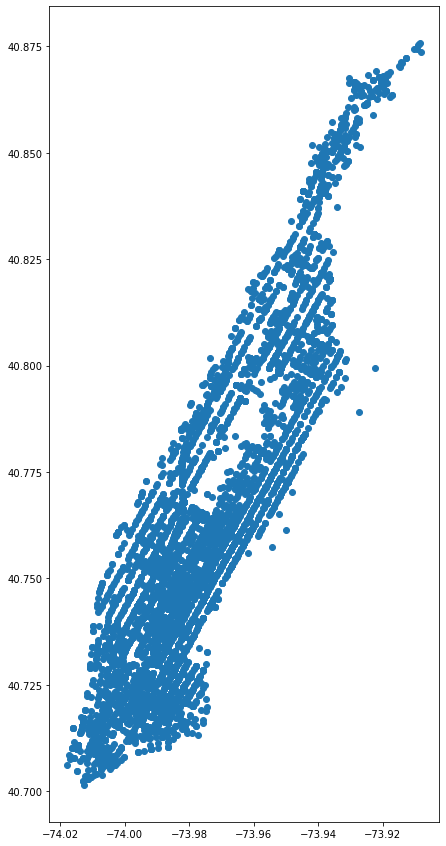

In [23]:
fig, ax = plt.subplots(1, 1, figsize=(15, 15))
Crash_data_Manhatten_BiCycles_gdf.plot(ax=ax)

### Converting date_time column to Day , Month , Year Columns

In [27]:
#convert to datetime type
Crash_data_Manhatten_BiCycles_gdf['date_time'] = pd.to_datetime(Crash_data_Manhatten_BiCycles_gdf['date_time']).dt.date

#Split columns
Crash_data_Manhatten_BiCycles_gdf['day'] = pd.to_datetime(Crash_data_Manhatten_BiCycles_gdf['date_time']).dt.day
Crash_data_Manhatten_BiCycles_gdf['month'] = pd.to_datetime(Crash_data_Manhatten_BiCycles_gdf['date_time']).dt.month
Crash_data_Manhatten_BiCycles_gdf['year'] = pd.to_datetime(Crash_data_Manhatten_BiCycles_gdf['date_time']).dt.year


/opt/anaconda3/lib/python3.8/site-packages/geopandas/geodataframe.py:1351: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


In [29]:
#sanity check
Crash_data_Manhatten_BiCycles_gdf.columns

Index(['cartodb_id', 'socrata_id', 'on_street_', 'cross_stre', 'date_time',
       'latitude', 'longitude', 'borough', 'zip_code', 'crash_coun',
       'number_of_', 'number_o_1', 'number_o_2', 'number_o_3', 'number_o_4',
       'number_o_5', 'number_o_6', 'number_o_7', 'contributi', 'vehicle_ty',
       'geometry', 'day', 'month', 'year'],
      dtype='object')

In [30]:
Crash_data_Manhatten_BiCycles_gdf.year.value_counts()

2017    1354
2016    1313
2015    1183
2014    1179
2013    1164
2018     410
Name: year, dtype: int64

In [31]:
Crash_data_Manhatten_BiCycles_gdf.head()

,cartodb_id,socrata_id,on_street_,cross_stre,date_time,latitude,longitude,borough,zip_code,crash_coun,...,number_o_4,number_o_5,number_o_6,number_o_7,contributi,vehicle_ty,geometry,day,month,year
7,974858,79679.0,EAST 166 STREET,3 AVENUE,2013-05-13,NaN,NaN,Manhattan,None,1,...,0,0,1,0,"Unspecified,Unspecified","UNKNOWN,BICYCLE",None,13,5,2013
12,1826691,3448652.0,SAINT NICHOLAS AVENUE,WEST 118 STREET,2016-04-22,40.805028,-73.952760,Manhattan,10026,1,...,0,0,1,0,"Unspecified,Unspecified","PASSENGER VEHICLE,BICYCLE",POINT (-73.95276 40.80503),22,4,2016
17,975484,192749.0,WASHINGTON AVENUE,PARK AVENUE,2013-05-22,NaN,NaN,Manhattan,None,1,...,0,0,1,0,"Unspecified,Unspecified","SPORT UTILITY / STATION WAGON,BICYCLE",None,22,5,2013
35,1124345,3260394.0,WEST 64 STREET,WEST END AVENUE,2015-07-19,40.774735,-73.988176,Manhattan,10023,1,...,0,0,1,0,"Unspecified,Unspecified","PASSENGER VEHICLE,BICYCLE",POINT (-73.98818 40.77474),19,7,2015
48,2114631,3735348.0,WEST 123 STREET,None,2017-08-19,40.808860,-73.952130,Manhattan,10027,1,...,0,0,1,0,"Driver Inattention/Distraction,Unspecified","PASSENGER VEHICLE,BICYCLE",POINT (-73.95213 40.80886),19,8,2017


# Dropping rows with 'None' Geometry

In [43]:
Crash_data_Manhatten_BiCycles_gdf.drop(Crash_data_Manhatten_BiCycles_gdf[Crash_data_Manhatten_BiCycles_gdf.geometry == None].index , inplace=True)

/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [46]:
Crash_data_Manhatten_BiCycles_gdf.shape

(6479, 24)

# FINAL NYC BICYCLE CRASH DATA - MANHATTAN ONLY

In [48]:
Crash_Data_final_gdf = Crash_data_Manhatten_BiCycles_gdf

---